In [33]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, fixed


# Constantes
k = 1  # Constante de Coulomb

# Grid
x_min, x_max, nx = -5, 5, 200
y_min, y_max, ny = -5, 5, 200

x_vals = np.linspace(x_min, x_max, nx)
y_vals = np.linspace(y_min, y_max, ny)
X, Y = np.meshgrid(x_vals, y_vals)

In [34]:
def potencial_carga_unica(q, x0, y0, X, Y):
    """
    Calcula o potencial devido a uma única carga pontual.
    """
    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    R[R == 0] = 1e-20  # para evitar divisão por zero
    return k * q / R


def campo_carga_unica(q, x0, y0, X, Y):
    """
    Calcula as componentes do campo elétrico de uma única carga pontual.
    """
    Rx = X - x0
    Ry = Y - y0
    R = np.sqrt(Rx**2 + Ry**2)
    R[R == 0] = 1e-20  # para evitar divisão por zero
    Ex = k * q * Rx / R**3
    Ey = k * q * Ry / R**3
    return Ex, Ey


def potencial_total(cargas, X, Y):
    """
    Soma dos potenciais gerados por várias cargas.
    """
    V_total = np.zeros_like(X)
    for q, x0, y0 in cargas:
        V_total += potencial_carga_unica(q, x0, y0, X, Y)
    return V_total


def campo_total(cargas, X, Y):
    """
    Soma das componentes do campo elétrico geradas por várias cargas.
    """
    Ex_total = np.zeros_like(X)
    Ey_total = np.zeros_like(Y)
    for q, x0, y0 in cargas:
        Ex, Ey = campo_carga_unica(q, x0, y0, X, Y)
        Ex_total += Ex
        Ey_total += Ey
    return Ex_total, Ey_total

In [35]:
def plotar_campo_e_potencial(cargas, titulo):
    """
    Plota as linhas de equipotencial e o campo elétrico para as cargas fornecidas.
    """
    V = potencial_total(cargas, X, Y)
    Ex, Ey = campo_total(cargas, X, Y)

    plt.figure(figsize=(8, 6))
    levels = np.linspace(np.min(V), np.max(V), 50)
    cp = plt.contour(X, Y, V, levels=levels, cmap="RdBu")
    plt.clabel(cp, inline=True, fontsize=8)
    plt.streamplot(X, Y, Ex, Ey, color="k", density=1.0, linewidth=0.5)

    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.show()

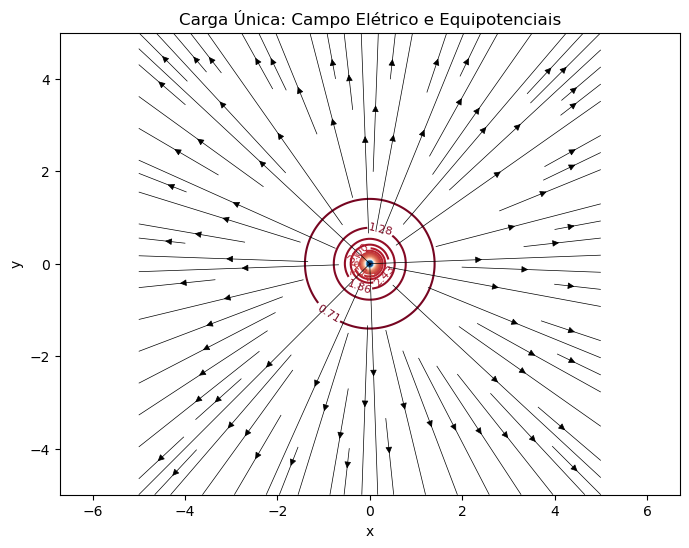

In [36]:
# Carga única: +1 na origem
cargas_unicas = [(1, 0, 0)]
plotar_campo_e_potencial(cargas_unicas, "Carga Única: Campo Elétrico e Equipotenciais")

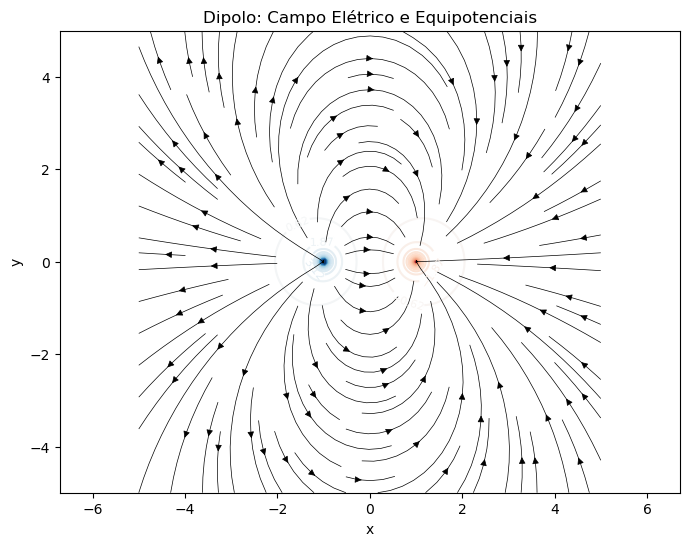

In [37]:
# Dipolo: +1 e -1 posicionadas simetricamente
cargas_dipolo = [(+1, -1, 0), (-1, 1, 0)]
plotar_campo_e_potencial(cargas_dipolo, "Dipolo: Campo Elétrico e Equipotenciais")

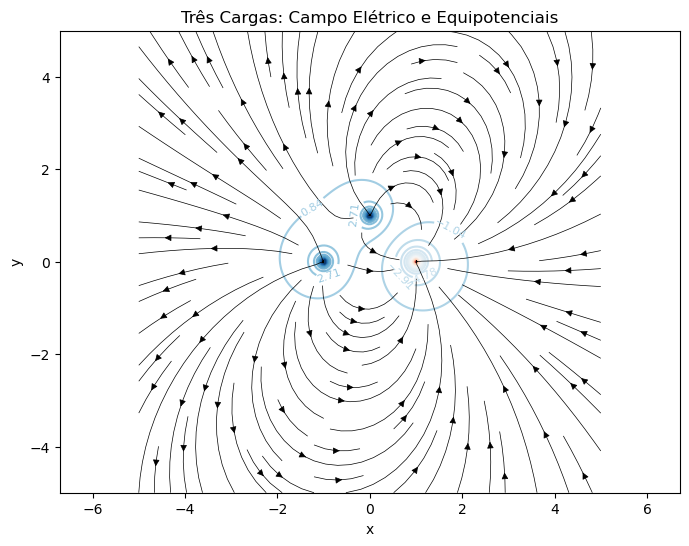

In [38]:
# Três cargas: ajuste as posições/magnitudes conforme necessário
cargas_tres = [
    (+1, -1, 0),  # +1 em (-1, 0)
    (-2, 1, 0),  # -2 em (1, 0)
    (+1, 0, 1),  # +1 em (0, 1)
]
plotar_campo_e_potencial(cargas_tres, "Três Cargas: Campo Elétrico e Equipotenciais")